## Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

In [2]:
# output: index matrix of top value
def find_top_index(matrix, k):
    k = -k
    answer = list()
    for row in matrix:
        answer.append(sorted(range(len(row)), key=lambda i: row[i])[k:])
        
    return answer
def compare_matrix(matrix_gf, matrix_knn, K, N=1000):
    count = 0
    for row1, row2 in zip(matrix_gf, matrix_knn):
        count += len(set(row1) & set(row2))
    return count/(K*N)
def KNN(filename, K):
    df = pd.read_csv(filename, index_col=0)
#     df = df[["x", "y", "z"]]
    
    nbrs = NearestNeighbors(n_neighbors=K, algorithm='ball_tree').fit(df)
    distances, indices = nbrs.kneighbors(df)
    ans = nbrs.kneighbors_graph(df).toarray()
    return ans, distances, indices

## Show synthetic data(ONLY on jupyter)

In [208]:
def show_manifold(filename):
    df = pd.read_csv(filename, index_col=0)
    number = [[], [], []]
    number[0] = df["x"]
    number[1] = df["y"]
    number[2] = df["z"]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

 
    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    for i in range(len(number[0])):
        ax.scatter(number[0][i], number[1][i], number[2][i], c="r", marker="o")
 
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

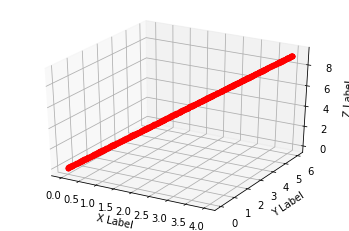

In [209]:
show_manifold("linear.csv")

## Show geodesic precision(ONLY on jupyter)

In [3]:
def show_chart(precision1, precision2, name, i):
    K = [50, 100, 150, 200]
    a1 = plt.plot(K, precision1, linestyle='solid', color='indigo', marker='o')
    a2 = plt.plot(K, precision2, linestyle='dashed', color='limegreen', marker='o')
    plt.xticks(K)
    plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel("K", fontsize = 20)
    plt.ylabel("Geodesic Precision", fontsize = 20)
    plt.title(name, fontsize=30)

In [323]:
# # 放不同的precision
# # precision_Fast = []
# precision_Fast = [[0.8, 0.6, 0.5, 0.34], [0.9, 0.8, 0.7, 0.6], [0.7, 0.65, 0.6, 0.2], [0.9, 0.88, 0.72, 0.66]]
# precision_TM = [[0.98, 0.5, 0.4, 0.3], [0.9, 0.88, 0.72, 0.66], [0.9, 0.8, 0.7, 0.6], [0.7, 0.65, 0.6, 0.2]]

# name = ["Linear", "Helix", "Sphere", "Gaussian Mixture"]

# fig , ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20,6))
# for i in range(4):
#     plt.subplot(1, 4, i+1)
#     show_chart(precision_Fast[i], precision_TM[i], name[i], i)

In [79]:
helix = np.loadtxt("similarity_matrix_Helix.txt")
linear = np.loadtxt("similarity_matrix_Linear.txt")
sphere = np.loadtxt("similarity_matrix_Sphere.txt")
GM = np.loadtxt("similarity_matrix_GM.txt")
helix_two = np.loadtxt("two_Helix.txt")
linear_two = np.loadtxt("two_Linear.txt")
sphere_two = np.loadtxt("two_Sphere.txt")
GM_two = np.loadtxt("two_GM.txt")

In [97]:
def get_precision(gf_matrix, csv, K):
    answer = list()
    data = gf_matrix
    top_index = list()
    for i in K:
        top_index.append(find_top_index(data, i))
#     print(top_index)
    KNN_index = list()
    for i in K:
        ans, dis, index = KNN(csv, 200)
        KNN_index.append(index)
#     print(KNN_index)    
        
    
    for i in range(len(K)):
        answer.append(compare_matrix(top_index[i], KNN_index[i], K[i]))
    return answer

In [98]:
K = [50, 100, 150, 200]
precision_helix = get_precision(helix, "helix.csv", K)
precision_sphere = get_precision(sphere, "sphere.csv", K)
precision_GM = get_precision(GM, "GM.csv", K)
precision_linear = get_precision(linear, "linear.csv", K)

precision_helix_two = get_precision(helix_two, "helix.csv", K)
precision_sphere_two = get_precision(sphere_two, "sphere.csv", K)
precision_GM_two = get_precision(GM_two, "GM.csv", K)
precision_linear_two = get_precision(linear_two, "linear.csv", K)

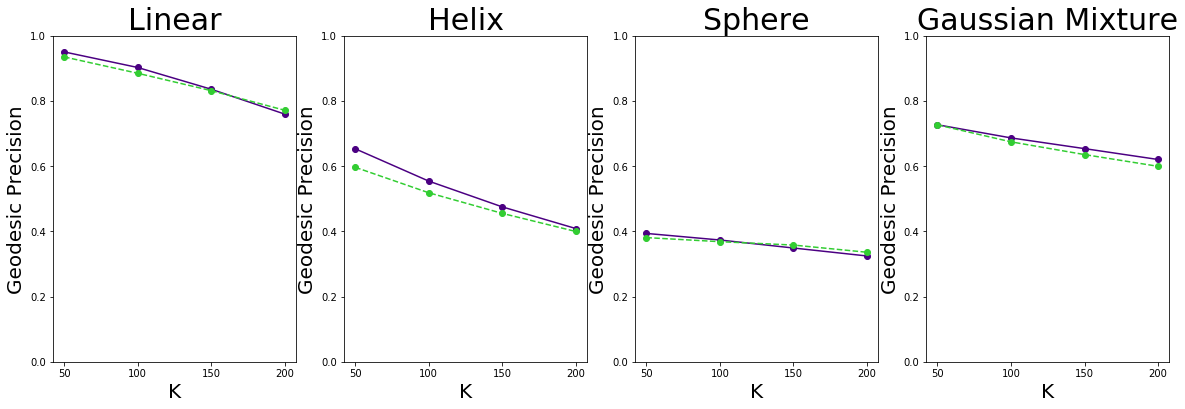

In [99]:
precision = [precision_linear, precision_helix, precision_sphere, precision_GM]
precision_two = [precision_linear_two, precision_helix_two, precision_sphere_two, precision_GM_two] 
name = ["Linear", "Helix", "Sphere", "Gaussian Mixture"]

fig , ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20,6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    show_chart(precision[i], precision_two[i], name[i], i)

Text(0.5, 0, 'Z Label')

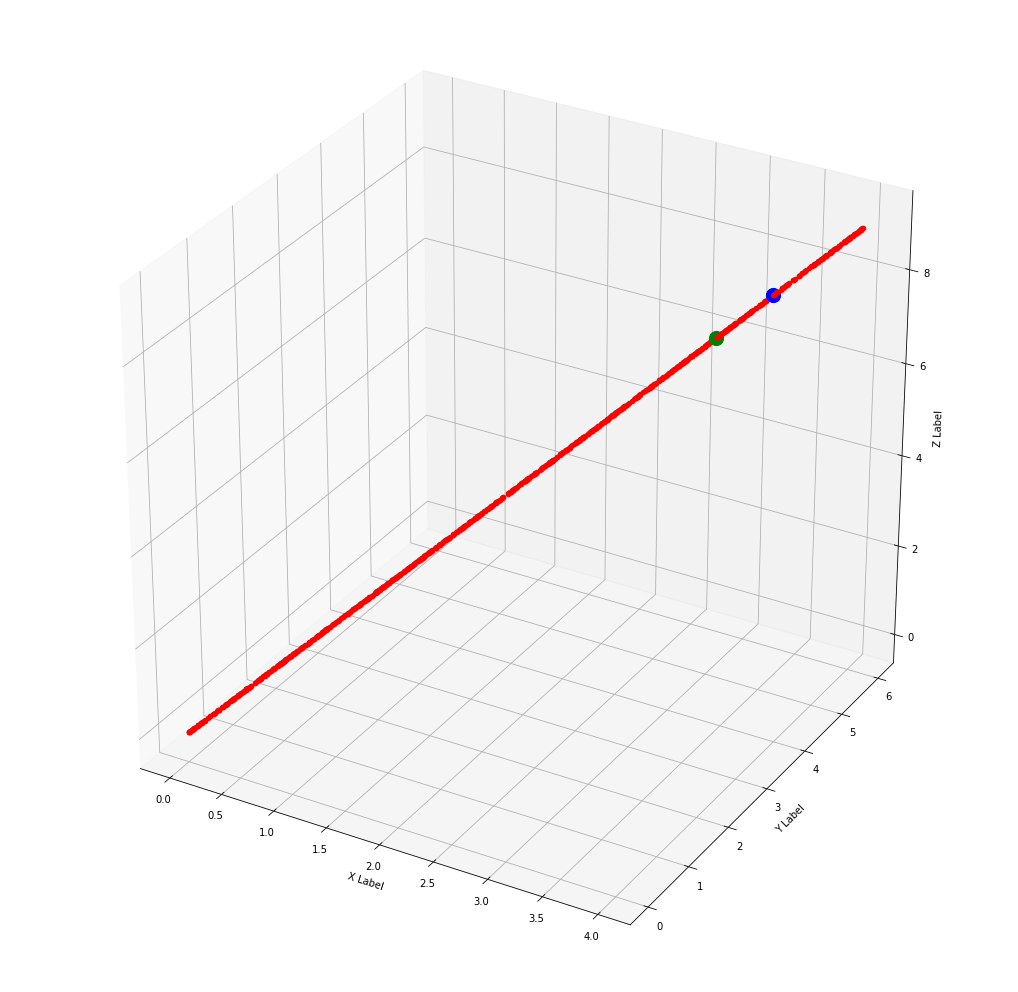

In [78]:
df = pd.read_csv("linear.csv")
df = df[["x", "y", "z"]]
number = [[], [], []]
number[0] = df["x"]
number[1] = df["y"]
number[2] = df["z"]



fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

 
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in range(len(number[0])):
    ax.scatter(number[0][i], number[1][i], number[2][i], c="r", marker="o")
    
ax.scatter(number[0][666], number[1][666], number[2][666], c="b", s=200, marker="o")
ax.scatter(number[0][959], number[1][959], number[2][959], c="g", s=200, marker="o")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')